### **Tutorial 10: Data Visualization**

In this tutorial, we will walk through the process of data visualization, a critical aspect of data engineering. 


## **1. Commonly Used Visualization Libraries**

### **Python Libraries:**
- **Matplotlib** – Basic plotting library
- **Seaborn** – Statistical data visualization
- **Plotly** – Interactive visualizations
- **Pandas Visualization** – Quick visualization of DataFrames
- **Dash** – Web-based visualization

### **Other Tools for Data Engineers/Analyst:**
- **Tableau** – Business Intelligence tool
- **Power BI** – Microsoft’s analytics platform
---

## **2. Data Visualization Best Practices**

### **Choose the Right Chart Type:**
| Data Type | Suggested Visualization |
|-----------|------------------------|
| Categorical | Bar Chart, Pie Chart |
| Time Series | Line Chart, Area Chart |
| Relationship | Scatter Plot, Bubble Chart |
| Distribution | Histogram, Box Plot |

In [44]:
import sqlite3
import pandas as pd

db_path = '../Projects/database/mmdt.db3'
# Join bhutan, participants and status table

query = """
        SELECT p.ID, 
        COALESCE(2024-p.BOD, 2024-substr(b.BOD,7,4))as age, 
        status 
        FROM participants as p
        LEFT JOIN bhutan as b    
        ON b.ID=p.ID
        LEFT JOIN status as s
        on p.ID = s.participant_ID;
"""
df = pd.read_sql_query(query, f"sqlite:///{db_path}")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      100 non-null    object 
 1   age     100 non-null    float64
 2   Status  100 non-null    object 
dtypes: float64(1), object(2)
memory usage: 2.5+ KB


#### Q1. Data visualization can reveal inconsistencies in datasets. 
- Run the following code to generate a histogram of age distribution. 
- Analyze the output and identify any irregularities in the data. 
- What issue do you observe, and how would you correct it?

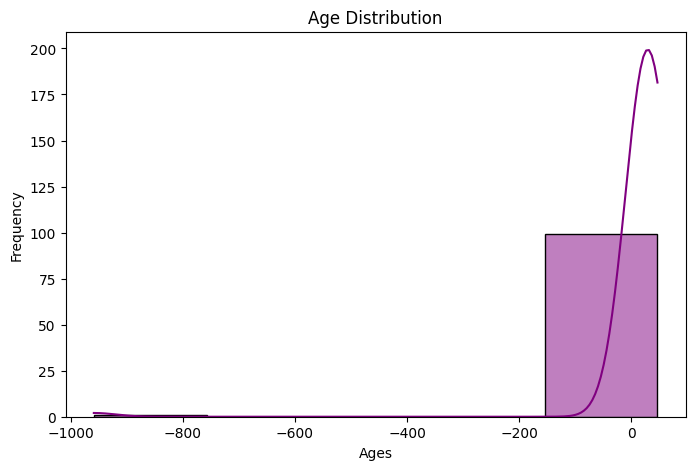

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Seaborn - Histogram for Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=5, kde=True, color='purple')
plt.title('Age Distribution')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.show()

#### Q2. Data visualization helps identify trends in datasets.

- Run the following code to generate a line plot of order counts over time.
- The plot contains too many data points (over 1000), making it difficult to interpret trends or detect anomalies. 
- Modify the data or visualization to improve readability and clarity.
- List your obvserations about the sales data. 

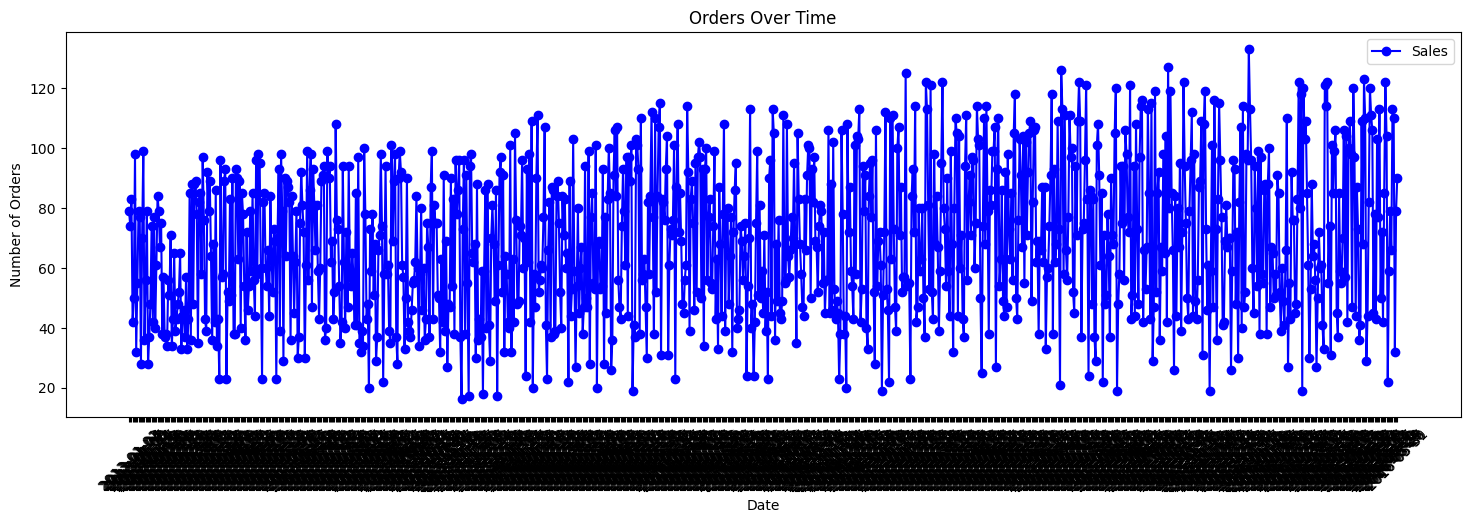

In [46]:
data_path = "./data/raw/sales_data.csv"
df = pd.read_csv(data_path)

df_order = df[['OrderID', 'OrderDate']].groupby('OrderDate').count().reset_index()
df_order = df_order.rename(columns={'OrderID': 'OrderCount'})
plt.figure(figsize=(18, 5))
plt.plot(df_order['OrderDate'], df_order['OrderCount'], marker='o', linestyle='-', color='b', label='Sales')
plt.title('Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend()
plt.show()
